In [1]:
%matplotlib inline
%precision 16
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Final Project

This notebook will provide a brief structure and rubric for presenting your final project. 

The purpose of the project is 2-fold
* To give you an opportunity to work on a problem you are truly interested in (as this is the best way to actually learn something)
* To demonstrate to me that you understand the overall workflow of problem solving from problem selection to implementation to discussion 

You can choose any subject area that interests you as long as there is a computational component to it.  However, please do not reuse projects or homeworks you have done in other classes.  This should be **your** original work.

**You can work in teams, but clearly identify each persons contribution** and every team member should hand in their own copy of the notebook.

### Structure
There are 5 parts for a total of 100 points that provide the overall structure of a mini research project.

* Problem Description
* Problem Justification
* Description of Computational components needed to address problem
* Implementation including tests
* Discussion of results and future directions

For grading purposes, please try to make this notebook entirely self contained. 

The project is worth about 2 problem sets and should be of comparable length (please: I will have about 100 of these to read and I am not expecting full 10 page papers).  The actual project does not necessarily have to work but in that case you should demonstrate that you understand why it did not work and what steps you would take next to fix it.

Have fun

## Problem Description [15 pts]

In ~4-5 paragraphs, describe the general problem you want to solve and the goals you hope to achieve. You should provide any relevant background, equations you plan to solve and references, particularly if you are reproducing results from a paper.  Please use proper spelling and grammar. 

We were inspired by the Fokker Planck equation that we were briefly introduced to in the Stochastic Calculus course that we took last semester. For a given Ito diffusion $X_t$ described as:
$$ dX_{t} = \mu(X_{t},t) \, dt + \sigma(X_{t},t) \, dW_{t} $$

the Fokker-Planck equation is:

$$\frac{\partial}{\partial t} p(x,t) = -\frac{\partial}{\partial x}\left[\mu(x,t) p(x,t)\right] + \frac{\partial^2}{\partial x^2}\left[\frac{\sigma^2(X_{t},t)}{2} p(x,t)\right]$$

Similarly, 
the Fokker-Planck equation for the Ornstein- Uhlenbeck (OU) Process $dS_{t}=-\mu S_{t}\,dt+\sigma \,dW_{t}$ would be:

$$\frac{\partial}{\partial t} p(x,t) = -\frac{\partial}{\partial x}\left[\mu x p(x,t)\right] + \frac{\partial^2}{\partial x^2}\left[\frac{\sigma^2 x}{2} p(x,t)\right]$$

where $\mu$ and $\sigma$ are constants.

We began by attempting to solve the Fokker-Planck for OU process using finite difference method. However, we were faced with the problem of non-linearity which would complicate the numerical analysis of this equation, as we will later discuss. We observed that the finite difference method yields good results only for small values of x in space discretization, near 0. The solution is unstable as x becomes larger. We understand that the finite difference method does not handle non-linearity well. This is because finite difference schemes typically rely on approximating derivatives using Taylor series expansions. When nonlinear terms are present, these expansions can become more complicated and may require higher-order terms to accurately capture the behavior of the equation. We gathered that finite volume method (FVM) is better, particularly for Fokker-Planck, because FVM inherently conserves mass and ensures that the probability densities remain normalized over time.

Therefore, we first tackle a simpler PDE without non-linearity involved. In doing so, we use multiple finite difference methods.

The problem we are focusing on in this project is the diffusion-advection equation with constant drift and diffusion coefficients:

$$\frac{\partial}{\partial t} p(x,t) = -\frac{\partial}{\partial x}\left[\mu p(x,t)\right] + \frac{\partial^2}{\partial x^2}\left[\sigma p(x,t)\right]$$

with non-zero $\mu$ to keep the advection term, and positive $\mu$ and $\sigma$.

We set our initial condition to be the standard Gaussian distribution:

$$p(x,0) = \frac{1}{\sqrt{2 \pi}}e^{-\frac{x^2}{2}}$$

The left boundary $a = -5$ and right boundary $b = 10$.

While we considered using Dirichlet boundary conditions, we decided that it made more sense physically to use Neumann boundary conditions. As you will see below, we allowed non-zero Neumann boundary conditions for the forward and backward time marching methods, but assumed zero boundary conditions for the Adam-Moulton Order 2 method (AM2 method) for simplicity. This boundary is called a Reflective boundary in relation to Fokker-Plank Equation.

## Problem Justification [5 pts] 

Briefly describe why this problem is important to you,  and, if possible, to anyone else.

Last semester, we learned that Feymann Kac theorem helps us calculate the expectation of certain functions of $X_t$ by formulating them as deterministic PDE problems. This is how we came across the Fokker-Planck equations and became curious about how to numerically solve these PDE.

The Fokker-Planck equation is a powerful mathematical tool for analyzing stochastic processes, understanding randomness, and uncertainty in natural and engineered systems. This class of equations has applications in neuroscience, finance, and engineering among others.

Furthermore, the advection-diffusion equation is a fundamental PDE that describes the combined effects of advection (convection) and diffusion on the transport of a quantity, such as heat, mass, or momentum, in a medium. It is of significant importance in studying the natural systems and across various fields that involve modeling heat transfer processes, fluid flows, and pollutant dispersion, among others.

## Computational  Methods [10 pts]

Describe the specific approach you will take to solve some concrete aspect of the general problem. 

You should  include all the numerical or computational methods you intend to use.  These can include methods or packages  we did not discuss in class but provide some reference to the method. You do not need to explain in detail how the methods work, but you should describe their basic functionality and justify your choices. 

**If you need to install or import any additional python packages,  please provide complete installation instructions in the code block below**



We use the finite difference methods by discretizing time and space in a 2-D grid. Our discretization method of choice for space is centered difference, becaues of its simplicity for implementation but higher rate of convergence than forward or backward difference.

After space discretization, the problem essentially becomes an ODE of the vector $\textbf{p}(t) = [p_0(t), p_1(t), ..., p_{n-1}(t), p_{n}(t)]$. We used three different methods to discretize time: Forward Euler, Backward Euler, and Adam-Moulton two-step scheme (AM2). While we attempted to utilize the "solve_ivp" function we learned in class to solve this ODE, we ran into errors and were not able to finish it.

We anticipated that AM2 would perform the best, then Backward Euler, then Forward Euler and attempted to see if the former methods would correct any issues found in the latter methods.  

To implement the Neumann boundary conditions, we used centered difference in space but also used a combination of forward/backward difference to observe the differences they would make in the results. Indeed, our choice of discretization at the boundary points affected the performance of approximation method at the boundaries, though isually we did not see a huge difference in the interior points.

In [2]:
# Provide complete installation or import information for external packages or modules here e.g.

#pip install somepackage

## Implementation [60 pts]

Use the Markdown and Code blocks below to implement and document your methods including figures.  Only the first markdown block will be a grading cell but please add (not copy) cells in this section to organize your work. 

Please make the description of your problem readable by interlacing clear explanatory text with code (again with proper grammar and spelling). 
All code should be well described and commented.

For at least one routine you code below, you should provide a test block (e.g. that implements `numpy.testing` routines) to validate your code.  

An **important** component of any computational paper is to demonstrate to yourself and others that your code is producing correct results.

In [3]:
def axeslabel(title):
    axes.set_xlabel('x')
    axes.set_ylabel('p(x, t)')
    axes.set_title(f'{title}')
    axes.legend(loc="center left")
    axes.grid(True)
    return

In [4]:
## PARAMETERS ##

mu = 1.0  # -mu is the Drift constant
sigma = 1.0  # Diffusion constant

## INITIAL CONDITION ##

standard_gaussian = lambda x : 1/np.sqrt(2*np.pi) * np.exp(-0.5 * x**2)

In [5]:
##BOUNDARY CONDITION ##

a = -10 #left boundary
b = 10 #right boundary
nbcleft = 0 #neumann left bc
nbcright = 0 #neumann right bc

**Note**: we represent $ p(x_i, t_j) $ as $p_i^j$

Simple Advection-Diffusion Equation is 
\begin{equation}
    \frac{\partial p}{\partial t} = -\mu \frac{\partial p}{\partial x} + \sigma \frac{\partial^2 p}{\partial x^2}
\end{equation}
where $p=p(x,t)$ is probability density function in our case, and $\mu$ and $\sigma$ are constants for the drift term and diffusion term, respectively.

# Forward Euler Finite Difference

Forward Euler for time derivative:
$$ \frac{\partial p}{\partial t} \approx \frac{p_i^{n+1} - p_i^n}{\Delta t} $$

Central difference for first spatial derivative:
$$ \frac{\partial p}{\partial x} \approx \frac{p_{i+1}^n - p_{i-1}^n}{2\Delta x} $$

Central difference for second spatial derivative:
$$ \frac{\partial^2 p}{\partial x^2} \approx \frac{p_{i+1}^n + p_{i-1}^n - 2p_i^n}{(\Delta x)^2} $$

So, the advection-diffusion equation can be written as follows using the finite difference approximation

\begin{align*}
    \frac{ p_i^{j+1} - p_i^j }{ \Delta t } &= -\mu \frac{ p_{i+1}^j - p_{i-1}^j }{ 2 \Delta x}  + \sigma \frac{p_{i+1}^{j}+p_{i-1}^j-2 p_i^j}{(\Delta x)^2} \\
    &= \left[ \frac{\sigma}{\Delta x^2} + \frac{\mu}{2 \Delta x} \right] p_{i-1}^{j} + \left[-\frac{2\sigma}{(\Delta x)^2} \right] p_i^{j} + \left[ \frac{\sigma}{\Delta x^2}-\frac{\mu}{2\Delta x} \right] p_{i+1}^j
\end{align*}

or:

$$ p_i^{j+1} = \frac{\Delta t}{\Delta x} \left[ \big( \frac{\sigma}{\Delta x} + \frac{\mu}{2} \big) p_{i-1}^{j} + \big( 1-\frac{2\sigma}{\Delta x} \big) p_i^{j} + \big( \frac{\sigma}{\Delta x}-\frac{\mu}{2} \big) p_{i+1}^j \right]$$


**Boundary Condition**

Given domain $x \in [a,b]$, $x_0 = a$, $x_n = b$, and

\begin{equation} 
    \frac{\partial p}{\partial x} \bigg|_{x=a} = C_1 \quad \quad \frac{\partial p}{\partial x} \bigg|_{x=b} = C_2
\end{equation}

Using centered difference, we can represent these conditions as:

$$ \frac{p_{1}^j - p_{-1}^j}{2 \Delta x} = C_1 \implies p_{-1}^j = p_{1}^j - 2 C_1 \Delta x$$

$$\frac{p_{n+1}^j - p_{n-1}^j}{2 \Delta x} = C_2  \implies p_{n+1}^j = p_{n-1}^j + 2 C_2 \Delta x$$

Here, $x_{-1}$ and $x_{n+1}$ are "ghost points" that are beyond our boundary but they can be represented in terms of $p_{1}$ and $p_{n+1}$, respectively, and be substituted into the first and last rows of our matrix.

The final discretized form of this equation is therefore the following:

$$ \textbf{p}^{j+1} = (\textbf{A}+\textbf{I})\textbf{p}^{j} + \Delta t \begin{bmatrix}
    C_1 (-\mu - \frac{2\sigma}{\Delta x})\\
    \vdots\\
    C_2 (-\mu + \frac{2\sigma}{\Delta x})\\
\end{bmatrix}
$$

where $\textbf{p}^{j} = \begin{bmatrix}
    p_0^j\\
    \vdots\\
    p_n^j\\
\end{bmatrix}$, $\textbf{I}$ is the identity matrix, and 


$$\textbf{A} = \frac{\Delta t}{\Delta x} \cdot
\begin{bmatrix} 
    -\frac{2\sigma}{\Delta x}  &\frac{2\sigma}{\Delta x}  &   &   &   &   &  \\
    \frac{\sigma}{\Delta x} + \frac{\mu}{2}   & -\frac{2\sigma}{\Delta x}   & \frac{\sigma}{\Delta x} - \frac{\mu}{2}   &   &   &\cdots   &  \\
    & \frac{\sigma}{\Delta x} + \frac{\mu}{2}   & -\frac{2\sigma}{\Delta x}   & \frac{\sigma}{\Delta x} - \frac{\mu}{2}   &   &   &  \\
    &    &    &    &    &    &  \\
    &\vdots  &  &\ddots   &  & &  & \\
    &  &   &  & \frac{\sigma}{\Delta x} + \frac{\mu}{2}   & -\frac{2\sigma}{\Delta x}   & \frac{\sigma}{\Delta x} - \frac{\mu}{2} \\
    &  &  &  &  & \frac{2\sigma}{\Delta x} &-\frac{2\sigma}{\Delta x}  \\
\end{bmatrix}$$

In our problem $C_1 = C_2 = 0$ so we are left with 

$$\textbf{p}^{j+1} = (\textbf{A}+\textbf{I})\textbf{p}^{j}$$

Alternatively, the ODE form of this problem is

\begin{equation}
    \frac{d}{dt} \mathbf{p}^j = \mathbf{A} \cdot \mathbf{p}^j
\end{equation}

with neumann boundary conditions $\frac{\partial p}{\partial x} \bigg|_{x=a} = \frac{\partial p}{\partial x} \bigg|_{x=b} =0$,

so we can cancel out the advection term to obtain:

\begin{equation}
    \frac{\partial p_0}{\partial t} = \sigma \frac{\partial^2 p_0}{\partial x^2} \quad \quad \quad \frac{\partial p_n}{\partial t} = \sigma \frac{\partial^2 p_n}{\partial x^2}
\end{equation}

to formulate the first and last rows of the matrix $\textbf{A}$ similarly.

In [6]:
## JACOBIAN MATRIX ##

def fd_diffusion_matrix(k, Nx, del_t, del_x, nbcleft, nbcright):
    '''
    Creates a matrix for the time marching scheme of d/dt = k * d^2/dx^2, with neumann boundary condition.
    Used centered difference in space and forward time marching finite difference method

    Args:
        k: float
          diffusion coefficient
        Nx: int
          number of grids
        del_t: float
          timestep
        del_x: float
          grid spacing
        nbcleft: float
          left Neumann boundary condition
        nbcright:float
          right Neumann boundary condition

    returns:
        A: (nx+1) x (nx+1) matrix
        bc_vector: (nx+1) x 1 vector
    '''
    A = np.zeros((Nx+1, Nx+1))
    diagonal = np.ones(Nx+1)
    A += np.diag(-2 * diagonal, 0)
    A += np.diag(diagonal[:-1], 1)
    A += np.diag(diagonal[:-1], -1)
    A[0][1] = 2
    A[-1][-2] = 2
    A = A * (k * del_t/(del_x**2))

    bc_vector = np.zeros(Nx+1)
    bc_vector[0] = -2 * k * nbcleft * del_t / del_x
    bc_vector[-1] = 2 * k * nbcright * del_t / del_x

    return A, bc_vector

def fd_advection_matrix(k, Nx, del_t, del_x, nbcleft, nbcright):
    '''
      Creates a matrix for the time marching scheme of d/dt = k * d/dx, with neumann boundary condition.
      Used for centered difference forward time marching finite difference method

      Args:
        k: float
          advection coefficient
        Nx: int
          number of grids
        del_t: float
          timestep
        del_x: float
          grid spacing
        nbcleft: float
          left Neumann boundary condition
        nbcright:float
          right Neumann boundary condition

      returns:
        A: (nx+1) x (nx+1) matrix
        bc_vector: (nx+1) x 1 vector
    '''
    A = np.zeros((Nx+1, Nx+1))
    diagonal = np.ones(Nx+1)
    A += np.diag(0 * diagonal, 0)
    A += np.diag(diagonal[:-1], 1)
    A += np.diag(-diagonal[:-1], -1)
    A[0][1] = 0
    A[-1][-2] = 0
    A = A * (k * del_t/(2*del_x))

    bc_vector = np.zeros(Nx+1)
    bc_vector[0] = k * nbcleft * del_t
    bc_vector[-1] = k * nbcright * del_t

    return A, bc_vector

# Create Matrix for Neumann BC Finite Difference Forward Euler Method
def fd_advection_diffusion_matrix(mu, sigma, Nx, del_t, del_x, nbcleft, nbcright):
    '''
      Creates a matrix for the time marching scheme of d/dt = -mu*d/dx + sigma*d^2/dx^2, with neumann boundary condition.

      Args:
        mu: float
          -mu is the advection coefficient
        sigma: float
          diffusion coefficient
        Nx: int
          number of grids
        del_t: float
          timestep
        del_x: float
          grid spacing
        nbcleft: float
          left Neumann boundary condition
        nbcright:float
          right Neumann boundary condition

      returns:
        A: (nx+1) x (nx+1) matrix
        bc_vector: (nx+1) x 1 vector

    '''
    diffusion, bc_diffusion = fd_diffusion_matrix(sigma, Nx, del_t, del_x, 0, 0)
    advection, bc_advection = fd_advection_matrix(-mu, Nx, del_t, del_x, 0, 0)

    return diffusion + advection, bc_diffusion + bc_advection

In [7]:
## FORWARD EULER METHOD ##

def FD_FEuler_v1 (mu, sigma, nx, nt, del_t, initial_condition, nbcleft, nbcright, linear=True):
    '''
    If linear = True (by default), numerically solves dp/dt = -mu*dp/dx + sigma* d^2p/dx^2 using Forward Euler
    If linear = False, numerically solves the fokker planck for OU process using Forward Euler
    
    Args:
        mu: float
            constant such that -mu is the advection coefficient
        sigma: float
            diffusion coefficient
        nx: int
            number of space grids
        nt: int
            number of time grids
        del_t: float
            size of timestep
        initial_condition: function
            initial condition function
        nbcleft: float
            left boundary condition
        nbcright: float
            right boundary condition

      Returns:
          p_array: (nt+1) x (nx+1) matrix storing values at each time and space point
          x: vector of size (nx+1) storing x points at which p(x,t) is evaluated.
          del_x: size of space dimension grid

    '''
    # Discretization
    del_x = (b-a)/nx # Grid spacing
    x = np.linspace(a, b, nx + 1)

    p_array = np.zeros((nt+1, nx+1))
    p_array[0] = initial_condition(x)  # Initial condition

    # Main matrix
    if linear:
        A, bc_vector = fd_advection_diffusion_matrix (mu, sigma, nx, del_t, del_x, nbcleft, nbcright)
    elif linear==False:
        A = del_t*create_nonlinear_matrix_A(x, mu, sigma, del_x)
        bc_vector = np.zeros(nx+1)
    I = np.eye(nx+1)

    for j in range(nt):
    # Update solution using p_{n+1} = A * p_n
        p_array[j+1] = np.dot(A+I, p_array[j])+ bc_vector

    return p_array, x, del_x

In [8]:
mu = 1.
sigma = 1.
nx=100 #number of space grids
nt=5000 #number of time steps
del_t = 0.001 #uniform size of time steps

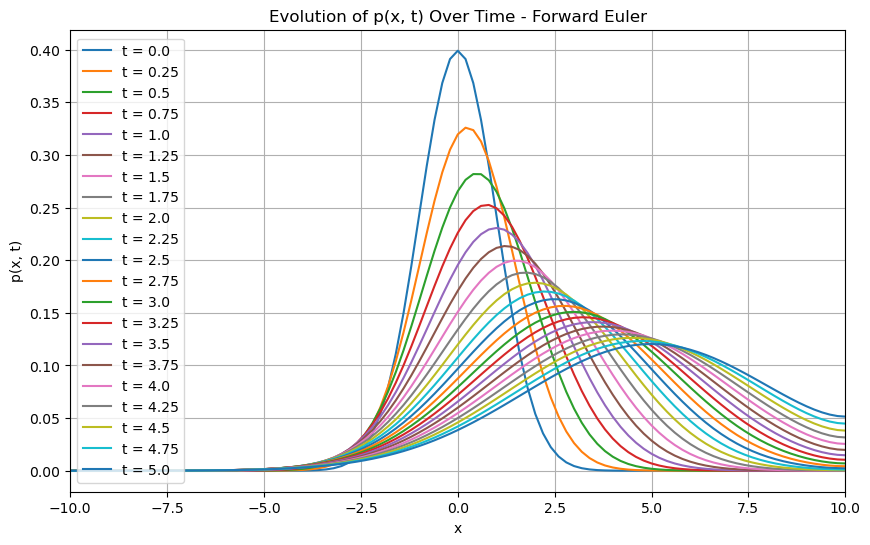

In [9]:
fig = plt.figure(figsize=(10,6))

p_array, x, del_x = FD_FEuler_v1 (mu, sigma, nx, nt, del_t, standard_gaussian, nbcleft, nbcright)

axes = fig.add_subplot(1, 1, 1)
for j in range(0,nt+1,int(nt/20)):
      axes.plot(x, p_array[j], label=f"t = {round(j*del_t,4)}")

axeslabel("Evolution of p(x, t) Over Time - Forward Euler")
plt.xlim(a, b) # Limit x-axis scale
plt.show()

**Error Analyses**

Error analysis in numerical methods for solving ODEs typically involves:
1. Local Truncation Error (LTE): $O(h^2)$, where $h$ is the time step (comparison between Taylor series of the true solution and the numerical approximation)
2. Global Truncation Error (GTE)}: $O(h)$ stability conditions (accumulated error during the computation of trajectory, $y^N$ from $y_0$ to $y_N$)


The global error $e$ is approximated as:
\begin{equation}
    e = \frac{\mathbf{u}^{n+1} - \mathbf{u}^n}{\Delta t} 
\end{equation}
which is proportional to the ratio of LTE to $h$.

**Stability Analyses**

The stability of the numerical method can be analyzed through the absolute stability condition:
\begin{equation}
    |1 + z| < 1 
\end{equation}
where $z = \Delta t \lambda$, and $\lambda$ are the eigenvalues of matrix $A$.

For matrix $A$, the stability requirement dictates:
$$ |1 + \Delta t \lambda_{\text{max}}| < 1 $$
where $\lambda_{\text{max}}$ is the eigenvalue of $A$ with the largest magnitude. This sets the largest allowable step size $\Delta t$ to ensure stability. The ODE system is stable only if the magnitude of all the eigen values of the matrix A lie within the unit circle.

**Error Analysis for Forward Euler Time Stepping Method**

Consider the Euler method for solving the ordinary differential equation (ODE): 
\begin{equation}
    y' = f(t, y) 
\end{equation}

**1. Local Truncation Error**

The local error $e$ is defined as:
\begin{equation}
    e = | y(t_{n+1}) - y_{n+1} | 
\end{equation}

Assuming the Taylor expansion for the true solution:
\begin{equation}
    y(t_{n+1}) = y(t_n) + h f(t_n, y(t_n)) + \frac{h^2}{2} y''(t_n, y(t_n)) 
\end{equation}

The Euler update step is:
\begin{equation}
    y_{n+1} = y_n + h f(t_n, y_n) 
\end{equation}

If we assume $y(t_n) = y_n$ then:
\begin{equation}
    y(t_{n+1}) - y_{n+1} = O(h^2) 
\end{equation}
If we don't assume $y(t_n) = y_n$, a cumulative error leads to global error.

**2. Global Truncation Error:**

Global error ($ge$) is approximately:
\begin{equation}
    ge \approx n \times \text{local error} 
\end{equation}

where $n = \frac{t}{h}$ and inaccuracies accumulate. Hence,
\begin{equation}
    ge \approx \frac{1}{h} \times (\text{local error}) 
\end{equation}

After taking one step, there is an error in the initial data, which affects the subsequent computations.


*Global error calculation using Discrete Gronwall Lemma*

In every timestep, there are two sources of errors:
- Error from the initial data
- Error accumulated from previous timesteps

Error in the new step is related to the error in the old step in a certain way.

Let $\{z_n\}_{n=0}^N$ be the error in each timestep, satisfying the recurrence:
\begin{equation}
    z_{n+1} = Az_n + b 
\end{equation}
Here $A$ represents how the previous error is propagated  and $b$ is a new error introduced at each step.

For $a = 1$, we have:
\begin{equation}
    z_n = nb +z_0
\end{equation}

Otherwise, for $a \neq 1$, it simplifies to:
\begin{equation}
    z_n = \frac{b}{a-1}(a^n - 1) + a^n z_0 
\end{equation}

The final error is bounded according to the discrete Gronwall lemma.


**Convergence**

A method is convergent if$\lim_{h \to 0} \max_{k} \| y_k - y(c_k) \| = 0 $, where $y_k$ is the numerical solution and $y(c_k)$ is the exact solution at time step $k$.

Given the Taylor expansion of the exact solution,
$$y(c_{k+1}) = y(c_k) + h f(c_k, y(c_k)) + O(h^2) $$

knowing that the numerical Forward Euler approximation is $y_{k+1} = y_k + h f(t_k, y_k) $, the error is then:
\begin{equation}
    e_{k+1} = e_k + h \left( f(c_k, y(c_k)) - f(t_k, y_k) \right) + O(h^2) 
\end{equation}

And hence:
\begin{equation}
    |e_{k+1}| \leq |e_k| + h \left| f(c_k, y(c_k)) - f(t_k, y_k) \right| + ch^2 
\end{equation}

where $c$ is some constant, capturing higher order terms in the error.

Assuming Lipschitz condition on $f$, we get:

\begin{equation}
    |e_{k+1}| \leq |e_k| + h \cdot L |e_k| + ch^2 
\end{equation}
where $L$ and $c$ are constants, and the error recurrence relation can be written as:
\begin{equation}
    |e_{k+1}| \leq (1 + hL) |e_k| + ch^2 
\end{equation}
This satisfies a discrete Gronwall condition:
\begin{equation}
    z_{n+1} \leq a z_n + b 
\end{equation}
where $a = 1 + hL$ and $b = ch^2$, and with $e_0 = 0$ for Euler's method.

Thus, the error at each step can be bounded by:
\begin{equation}
    |e_k| \leq \frac{ch^2}{L} ((1+hL)^k - 1) 
\end{equation}

Assuming that $hL \to 0$ as $h \to 0$, the error bound simplifies to:
\begin{equation}
    |e_k| \leq ch^2 \left( \frac{e^{hLk} - 1}{hL} \right) \approx ch^2 
\end{equation}

We conclude that $\lim_{h \to 0} |e_k| = 0$. Therefore, Euler's method converges, with Order 1.

Stability Analysis
Consider the linear stability of an update rule in matrix form, $ y_{k+1} = (I + \Delta t A) y_k$, where $A$ is a matrix and $I$ is the identity matrix.
The scheme is stable if all eigenvalues of $(I + \Delta t A)$ are inside the unit circle. This implies that
$y'= Ay$ results in a stable solution if all eigenvalues of $A$ are inside the unit circle, preserving the system's stability over time.


# Backward Euler Finite Difference

The Backward Euler fininte difference method is formulated as follows:

$$ \textbf{p}^{j} - \textbf{p}^{j-1}= \textbf{A}\textbf{p}^{j} + \Delta t \begin{bmatrix}
    C_1 (-\mu - \frac{2\sigma}{\Delta x})\\
    \vdots\\
    C_2 (-\mu + \frac{2\sigma}{\Delta x})\\
\end{bmatrix} \implies  (\textbf{I}-\textbf{A})\textbf{p}^{j} = \Delta t \begin{bmatrix}
    C_1 (-\mu - \frac{2\sigma}{\Delta x})\\
    \vdots\\
    C_2 (-\mu + \frac{2\sigma}{\Delta x})\\
\end{bmatrix} + \textbf{p}^{j-1}
$$

$$ \textbf{p}^{j} = (\textbf{I}-\textbf{A})^{-1} \left[ \Delta t \begin{bmatrix}
    C_1 (-\mu - \frac{2\sigma}{\Delta x})\\
    \vdots\\
    C_2 (-\mu + \frac{2\sigma}{\Delta x})\\
\end{bmatrix} + \textbf{p}^{j-1} \right]
$$

Again, $C_1 = C_2 = 0$ so we are left with:

$$ \textbf{p}^{j} = (\textbf{I}-\textbf{A})^{-1} \textbf{p}^{j-1}
$$

In [10]:
def FD_BEuler_v1 (mu, sigma, nx, nt, del_t, initial_condition, nbcleft, nbcright, linear=True):
    '''
    If linear = True (by default), numerically solves dp/dt = -mu*dp/dx + sigma* d^2p/dx^2 using Backward Euler
    If linear = False, numerically solves the fokker planck for OU process using Backward Euler
    
    Args:
        mu: float
            constant such that -mu is the advection coefficient
        sigma: float
            diffusion coefficient
        nx: int
            number of space grids
        nt: int
            number of time grids
        del_t: float
            size of timestep
        initial_condition: function
            initial condition function
        nbcleft: float
            left boundary condition
        nbcright: float
            right boundary condition

      Returns:
          p_array: (nt+1) x (nx+1) matrix storing values at each time and space point
          x: vector of size (nx+1) storing x points at which p(x,t) is evaluated.
          del_x: size of space dimension grid

    '''
    # Discretization
    del_x = (b-a)/nx # Grid spacing
    x = np.linspace(a, b, nx + 1)

    p_array = np.zeros((nt+1, nx+1))
    p_array[0] = initial_condition(x)  # Initial condition

    # Main matrix
    if linear:
        A, bc_vector = fd_advection_diffusion_matrix (mu, sigma, nx, del_t, del_x, nbcleft, nbcright)
    elif linear == False:
        A = del_t*create_nonlinear_matrix_A(x, mu, sigma, del_x)
        bc_vector = np.zeros(nx+1)
    I = np.eye(nx+1)
    
    # Compute M = I - A
    M = I - A

    # Compute the inverse of M
    M_inv = np.linalg.inv(M)

    for j in range(nt):
        p_array[j+1] = np.dot(M_inv, p_array[j]+bc_vector)

    return p_array, x, del_x

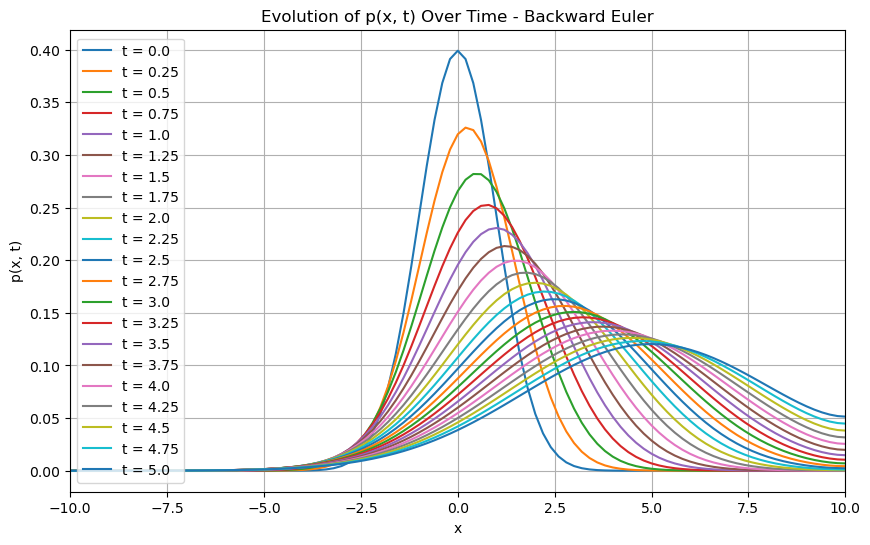

In [11]:
fig = plt.figure(figsize=(10,6))

p_array, x, del_x = FD_BEuler_v1 (mu, sigma, nx, nt, del_t, standard_gaussian, nbcleft, nbcright)

axes = fig.add_subplot(1, 1, 1)
for j in range(0,nt+1,int(nt/20)):
      axes.plot(x, p_array[j], label=f"t = {round(j*del_t,4)}")

axeslabel("Evolution of p(x, t) Over Time - Backward Euler")
plt.xlim(a, b) # Limit x-axis scale
plt.show()

**Error Analysis for Backward Euler Method**

Using Backward euler approximation, we have:
\begin{equation}
    y(t_{k+1}) = y(t_k) - h f(t_{k+1}, y(t_{k+1})) 
\end{equation}

Expanding $y(t_k)$ using Taylor series:
\begin{equation}
    y(t_{k+1}) = y(t_k) + h f(t_{k+1}, y(t_{k+1})) + O(h^2) 
\end{equation}

For the Backward Euler method:
\begin{equation}
    y_{k+1} = y_k + h f(c_{k+1}, y_{k+1}) 
\end{equation}

Comparing the Taylor expansion and the method:
\begin{equation}
    y_{k+1} - y(t_{k+1}) = y_k - y(t_k) + h \left( f(t_{k+1}, y_{k+1}) - f(t_{k+1}, y(t_{k+1}) \right) + O(h^2) 
\end{equation}

Let $e_k = y_k - y(t_k)$ be the error at step $k$. Then, the error at step $k+1$ is given by:
\begin{equation}
    e_{k+1} = e_k + O(h^2) 
\end{equation}

Thus, the local truncation error (LTE) is $O(h^2)$, and the global error is proportional to the LTE divided by $h$, giving:
\begin{equation}
    \text{Global error} \approx O(h) 
\end{equation}


# Adams-Moulton Two-Step Method (AM2)


In [12]:
def AM2(mu, sigma, nx, nt, del_t, initial_condition, nbcleft, nbcright, linear = True):
    """
    If linear = True (by default), numerically solves dp/dt = -mu*dp/dx + sigma* d^2p/dx^2 using Adam-Moulton 2nd Order Method.
    If linear = False, numerically solves the fokker planck for OU process using Adam-Moulton 2nd Order Method.
    
    Args:
        mu: float
            constant such that -mu is the advection coefficient
        sigma: float
            diffusion coefficient
        nx: int
            number of space grids
        nt: int
            number of time grids
        del_t: float
            size of timestep
        initial_condition: function
            initial condition function
        nbcleft: float
            left boundary condition
        nbcright: float
            right boundary condition

      Returns:
          p_array: (nt+1) x (nx+1) matrix storing values at each time and space point
          x: vector of size (nx+1) storing x points at which p(x,t) is evaluated.
          del_x: size of space dimension grid
    """
    # Discretization
    del_x = (b-a)/nx # Grid spacing
    x = np.linspace(a, b, nx + 1)

    # Initialize solution arrays
    y = np.zeros((nt+1, nx+1))
    y[0] = initial_condition(x)  # Initial condition
    
    # Main matrix
    if linear:
        A, bc_vector = fd_advection_diffusion_matrix (mu, sigma, nx, del_t, del_x, nbcleft, nbcright)
    elif linear == False:
        A = del_t*create_nonlinear_matrix_A(x, mu, sigma, del_x)
        bc_vector = np.zeros(nx+1)
        
    # Adams-Moulton coefficients (2nd order)
    alpha0 = 1/2
    alpha1 = 1/2

    # Corrector (Adams-Moulton 2nd order)
    for i in range(1, nt+1):
        y_pred = y[i-1] + np.dot(A, y[i-1])
        y[i] = y[i-1] + np.dot(A, alpha0 * y[i-1] + alpha1 * y_pred)

    return y, x, del_x

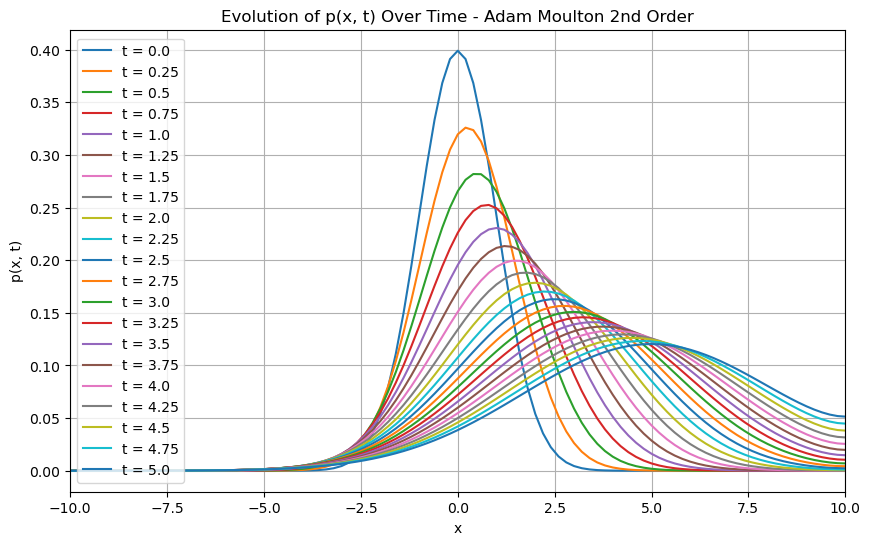

In [13]:
fig = plt.figure(figsize=(10,6))

p_array, x, del_x = AM2 (mu, sigma, nx, nt, del_t, standard_gaussian, nbcleft, nbcright)

axes = fig.add_subplot(1, 1, 1)
for j in range(0,nt+1,int(nt/20)):
      axes.plot(x, p_array[j], label=f"t = {round(j*del_t,4)}")

axeslabel("Evolution of p(x, t) Over Time - Adam Moulton 2nd Order")
plt.xlim(a, b) # Limit x-axis scale

plt.show()

Interpretation of graph: AM2 is a second-order accurate multi-step method, hence the solution is more accurate than the first order accurate Euler methods. Additionally, owning to it being a second order multi-step  implicit method, we have faster convergence. We have not made a convergence plot because, the analytical solution would require the computation of n eigen vectors of A matrix, which proved to be tedious and time-consuming. 
Multistep methods use information from multiple previous time steps to compute the solution at the current time step. By leveraging this additional information, they can often make more accurate predictions of the solution, leading to faster convergence.

**AM2 Error Analysis**

We know for Adams methods,
\begin{equation}
    U_{n+r} = U_{n+r-1} + \Delta t \sum^r_{j=0} \beta_j f(U_{n+j})\end{equation}
We can derive its error estimate using the formula for truncation error:
$$
\begin{aligned}
    T(t, u; \Delta t) &= \frac{1}{\Delta t}\left( \sum^r_{j=0} \alpha_j\right) u(t_n) + \left(\sum^r_{j=0} (j\alpha_j - \beta_j)\right) u'(t_n) + \Delta t \left(\sum^r_{j=0} \left (\frac{1}{2}j^2 \alpha_j - j \beta_j \right) \right) u''(t_n) \\
& \quad \quad + \cdots + \Delta t^{q - 1} \left (\sum^r_{j=0} \left(\frac{1}{q!} j^q \alpha_j - \frac{1}{(q-1)!} j^{q-1} \beta_j \right) \right) u^{(q)}(t_n) + \cdots
\end{aligned}$$

All these methods have $\alpha_r = 1$, $\alpha_{r-1} = -1$ and $\alpha_j=0$ for $j < r - 1$.
Given r=2, 
$\alpha_2 = 1$, $\alpha_{1} = -1$ and $\alpha_0=0$ 

Truncation error:
$$
\begin{aligned}
    T(t, u; \Delta t) &= \frac{1}{\Delta t}\left( \sum^r_{j=0} \alpha_j\right) u(t_n) + \left(\sum^r_{j=0} (j\alpha_j - \beta_j)\right) u'(t_n) + \Delta t \left(\sum^r_{j=0} \left (\frac{1}{2}j^2 \alpha_j - j \beta_j \right) \right) u''(t_n) \\
& \quad \quad + \cdots + \Delta t^{q - 1} \left (\sum^r_{j=0} \left(\frac{1}{q!} j^q \alpha_j - \frac{1}{(q-1)!} j^{q-1} \beta_j \right) \right) u^{(q)}(t_n) + \cdots
\end{aligned}$$
But,
$$
\frac{1}{\Delta t}\left( \sum^2_{j=0} \alpha_j\right) u(t_n)= 0 
$$

So, 
$$
T(t, u; \Delta t) = \left(\sum^2_{j=0} (j\alpha_j - \beta_j)\right) u'(t_n) + \Delta t \left(\sum^2_{j=0} \left (\frac{1}{2}j^2 \alpha_j - j \beta_j \right) \right) u''(t_n) + ...
$$

For methods to be consistent, as $\Delta t$ goes to 0, truncation error $T(t, u; \Delta t) $ must go to 0. 
$$\implies \left(\sum^2_{j=0} (j\alpha_j - \beta_j)\right)= 0 $$


**Stability of AM2 Method**

\begin{equation}
    U_{n+2} = U_{n+1} + \frac{\Delta t}{12} (-f_{n} + 8 f_{n+1} + 5 f_{n+2}),
\end{equation}

\begin{equation}
    \sum^r_{j=0} (\alpha_j - \beta_j z) U_{n+j} = 0.
\end{equation}

\begin{equation}
    \rho(\xi) = \sum^r_{j=0} \alpha_j \xi^j, \quad \sigma(\xi) = \sum^r_{j=0} \beta_j \xi^j
\end{equation}


and substituting $U_n = \xi^n$ into the difference equations reduces to 

\begin{equation}
    \pi(\xi, z) = \rho(\xi) - z \sigma(\xi) = 0
\end{equation}

\begin{equation}
    \alpha_0= 0, \alpha_1= -1, \alpha_2=1
    \beta_0=-1/12, \beta_1=8/12, \beta_2=5/12
\end{equation}

So,
\begin{equation}
    \rho(\xi)= \xi^2 -\xi
\end{equation}
and

\begin{equation}
    \sigma(\xi) = \frac{-1}{12}+ \frac{8}{12}\xi +\frac{5}{12} \xi^2
\end{equation}

\begin{equation}
    \pi(\xi, z) = \rho(\xi) - z \sigma(\xi) = \xi^2 -\xi- z( \frac{-1}{12}+ \frac{8}{12}\xi +\frac{5}{12} \xi^2) =0
\end{equation}

# Comparing All Methods Side by Side

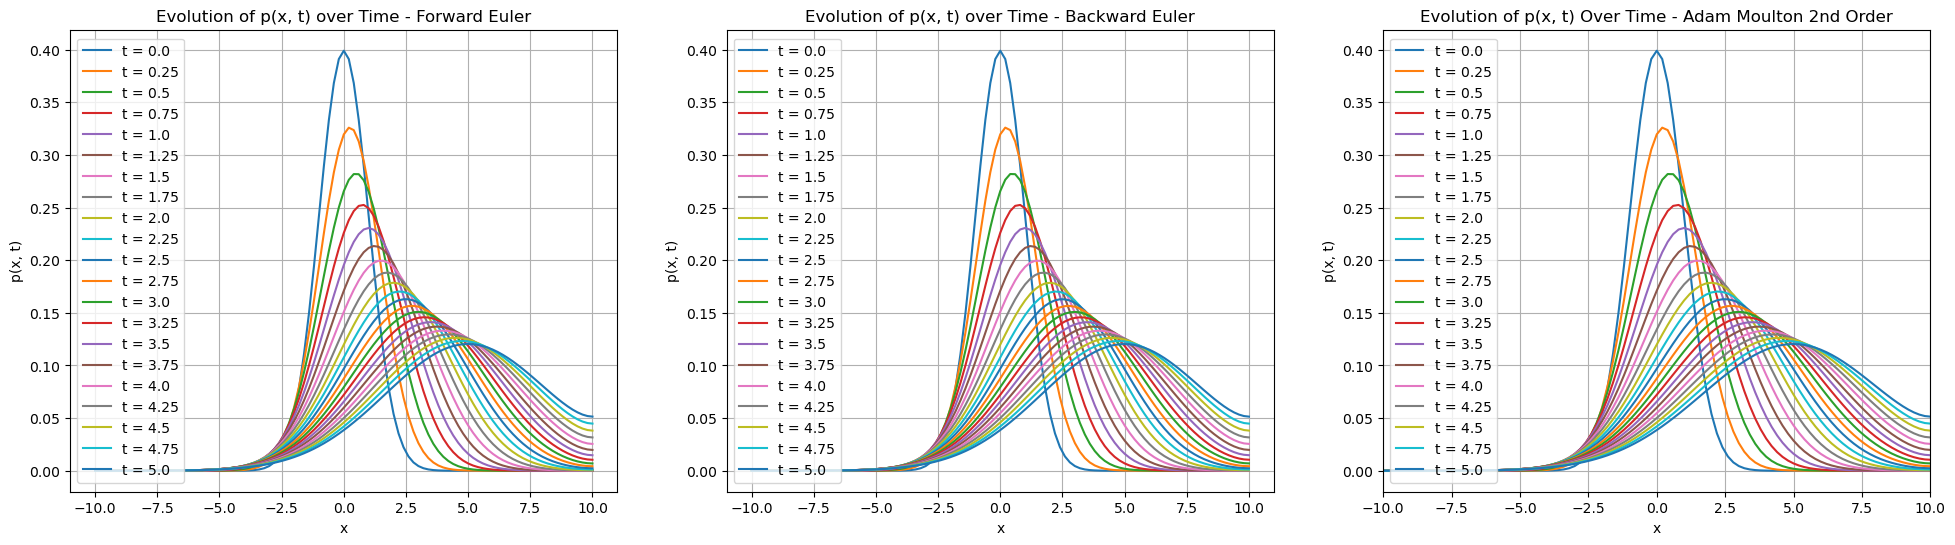

In [14]:
## Plotting ##

mu = 1.
sigma = 1.

fig = plt.figure(figsize=(24,6))

# 1. Forward Euler Method

p_array, x, del_x = FD_FEuler_v1 (mu, sigma, nx, nt, del_t, standard_gaussian, nbcleft, nbcright)

axes = fig.add_subplot(1, 3, 1)
for j in range(0,nt+1,int(nt/20)):
      axes.plot(x, p_array[j], label=f"t = {round(j*del_t,4)}")

axeslabel("Evolution of p(x, t) over Time - Forward Euler")


# 2. Backward Euler 

p_array, x, del_x = FD_BEuler_v1 (mu, sigma, nx, nt, del_t, standard_gaussian, nbcleft, nbcright)

axes = fig.add_subplot(1, 3, 2)
for j in range(0,nt+1,int(nt/20)):
      axes.plot(x, p_array[j], label=f"t = {round(j*del_t,4)}")

axeslabel("Evolution of p(x, t) over Time - Backward Euler")

# 3. AM2 Method #

p_array, x, del_x = AM2 (mu, sigma, nx, nt, del_t, standard_gaussian, nbcleft, nbcright)

axes = fig.add_subplot(1, 3, 3)
for j in range(0,nt+1,int(nt/20)):
      axes.plot(x, p_array[j], label=f"t = {round(j*del_t,4)}")

axeslabel("Evolution of p(x, t) Over Time - Adam Moulton 2nd Order")
plt.xlim(a, b) # Limit x-axis scale

plt.show()



**Linear Equation Summary**

We observe that the standard normal distribution evolves as such over time. We observe the diffusion as well as advection taking place. We observe the Neumann boundary condition set to 0 is implemented properly.

## Alternative Boundary Condition Implementation

We tried alternative method to using a centered difference for the boundary condition (as we did above) and used forward/backward difference at the boundaries.

$$\frac{\delta p_0}{\delta t} = \sigma \left[ \frac{p_2 + p_0 - 2p_1}{\Delta x^2} \right]$$

Conversely at x = b, let us use backward difference formulation. Then, we get:

$$\frac{\delta p_n}{\delta t} = \sigma \left[ \frac{p_{n} + p_{n-2} - 2p_{n-1}}{\Delta x^2} \right]$$

Therefore, we get the following matrix.

$$ \frac{\delta \textbf{p}^{j}}{\delta t} = A \textbf{p}^{j} $$

$$ A = \frac{\Delta t}{\Delta x} \cdot
\begin{bmatrix} 
    \frac{\sigma}{\Delta x^2}  &-\frac{2\sigma}{\Delta x^2}  &\frac{\sigma}{\Delta x^2}   &   &   &   &  \\
    \frac{\sigma}{\Delta x^2} + \frac{\mu}{2\Delta x}   & -\frac{2\sigma}{\Delta x^2}   & \frac{\sigma}{\Delta x^2} - \frac{\mu}{2\Delta x}   &   &\cdots   &   &  \\
        & \frac{\sigma}{\Delta x^2} + \frac{\mu}{2\Delta x}   & -\frac{2\sigma}{\Delta x^2}   & \frac{\sigma}{\Delta x^2} - \frac{\mu}{2\Delta x}   &   &   &  \\
        &    &    &    &    &    &  \\
         &\vdots  &  &\ddots     &       & &    & \\
        &     &       &  & \frac{\sigma}{\Delta x^2} + \frac{\mu}{2\Delta x}   & -\frac{2\sigma}{\Delta x^2}   & \frac{\sigma}{\Delta x^2} - \frac{\mu}{2\Delta x} \\
        &    &   &  &\frac{\sigma}{\Delta x^2}  &-\frac{2\sigma}{\Delta x^2}  &\frac{\sigma}{\Delta x^2}  \\
\end{bmatrix}$$

where $\textbf{p}$ represents a vector at a given time.

Notice that the first and last columns differ from the previous matrix.

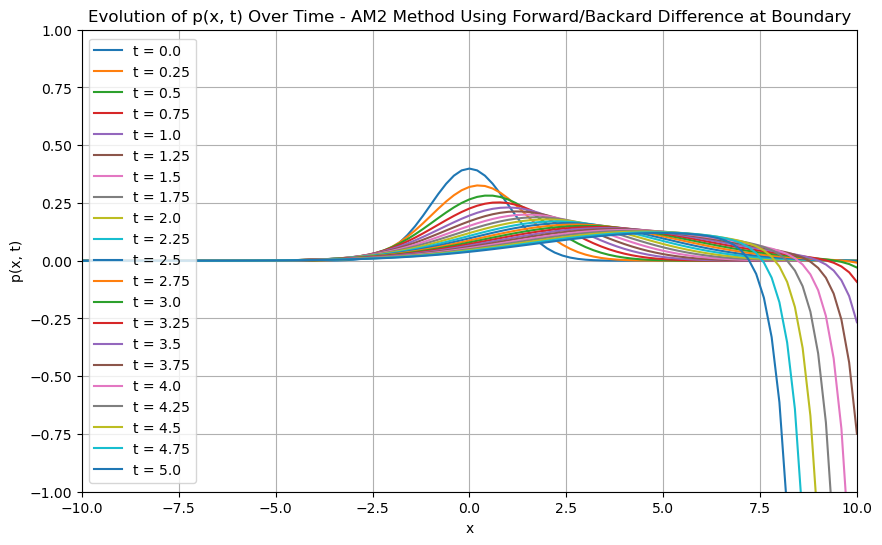

In [15]:
def fd_matrix_altboundary(nx, mu, sigma, del_x):
    """
      Creates a matrix for d/dt = -mu*d/dx + sigma*d^2/dx^2, with neumann boundary condition.

        Args:
            nx: int
              number of grids
            mu: float
              (-mu is drift const)
            sigma: float
              diffusion const
            del_x: float
                grid spacing

        Returns:
            A_matrix: (n+1) x (n+1) zero matrix
    """
    A_matrix = np.zeros((nx+1, nx+1))
    a=sigma/(del_x**2)
    b=mu/(2*del_x)
    # Set diagonal elements
    np.fill_diagonal(A_matrix, -2 * a)

    # Set right diagonal elements
    np.fill_diagonal(A_matrix[:, 1:], a - b)

    # Set left diagonal elements
    np.fill_diagonal(A_matrix[1:, :], a + b)

    # Modify the first row
    A_matrix[0, :3] = [a, -2 * a, a]

    # Modify the last row
    A_matrix[-1, -3:] = [a, -2 * a, a]

    return A_matrix


def AM2_altboundary(mu, sigma, nx, nt, del_t, initial_condition, nbcleft, nbcright, linear = True):
    """
    Solve the system of ODEs dy/dt = Ay using the Adams-Moulton method.

    Args:
        A: Matrix A in the system of ODEs
        y0: Initial condition vector
        t_span: Tuple (t0, t_end) specifying the time span
        dt: Time step size

    Returns:
        y: Solution array containing y values at different time steps
        t: Time array containing time values
    """
    # Discretization
    del_x = (b-a)/nx # Grid spacing
    x = np.linspace(a, b, nx + 1)

    # Initialize solution arrays
    y = np.zeros((nt+1, nx+1))
    y[0] = initial_condition(x)  # Initial condition
    
    # Main matrix
    A = del_t*fd_matrix_altboundary(nx, mu, sigma, del_x)
        
    # Adams-Moulton coefficients (2nd order)
    alpha0 = 1/2
    alpha1 = 1/2

    # Corrector (Adams-Moulton 2nd order)
    for i in range(1, nt+1):
        y_pred = y[i-1] + np.dot(A, y[i-1])
        y[i] = y[i-1] + np.dot(A, alpha0 * y[i-1] + alpha1 * y_pred)

    return y, x, del_x


fig = plt.figure(figsize=(10,6))

p_array, x, del_x = AM2_altboundary (mu, sigma, nx, nt, del_t, standard_gaussian, nbcleft, nbcright)

axes = fig.add_subplot(1, 1, 1)
for j in range(0,nt+1,int(nt/20)):
      axes.plot(x, p_array[j], label=f"t = {round(j*del_t,4)}")

axeslabel("Evolution of p(x, t) Over Time - AM2 Method Using Forward/Backard Difference at Boundary")
plt.xlim(a, b) # Limit x-axis scale
plt.ylim(-1,1)

plt.show()

Interpretation of graph: the solution blows up at the right boundary, because the internal points are evaluated to $O(h^2)$ accuracy, but the boundaries are evaluated at $O(h)$ accuracy. The error accumulates at the boundary and the solution blows up. We understand that it is better to use centered difference at the boundaries. 

## Fokker-Planck Equation (FPE) for Ornstein-Uhlenbeck (OU) Process

The OU $X_t$ process is governed by the Stochastic Differential Equation given below:
\begin{equation}
    dX_t =  -\mu  X_t dt + \sigma dW_t
\end{equation}

The corresponding Fokker-Planck equation (FPE) is given by:
\begin{equation}
    \frac{\partial}{\partial t} p(x,t) = -\frac{\partial}{\partial x}\left[\mu x p(x,t)\right] + \frac{\partial^2}{\partial x^2}\left[\frac{\sigma^2}{2} p(x,t)\right]
\end{equation}

For the discretized version using a Forward Euler method and centered difference approximation, the equation is:
\begin{equation}
    p_i^{j+1} - p_i^j = -\mu \frac{p_{i+1}^j - p_{i-1}^j}{2\Delta x} + \frac{\sigma^2}{2} \frac{p_{i+1}^j + p_{i-1}^j - 2p_i^j}{\Delta x^2} 
\end{equation}


Using the same discretization method as above, we get the following:

The ODE becomes, 
\begin{equation}
    \frac{d}{dt} \mathbf{p}^j = \mathbf{A} \cdot \mathbf{p}^j
\end{equation}
where matrix A is
\begin{aligned}
\begin{pmatrix}
-(\frac{ \sigma ^2}{(\Delta x)^2} +\mu)& \frac{\sigma ^2}{( \Delta x)^2} & 0 & \cdots & 0 \\
\frac{\sigma^2}{2(\Delta x)^2}+\frac{\mu x_1}{2*\Delta x} & -(\frac{ \sigma ^2}{(\Delta x)^2} +\mu) & \frac{\sigma^2}{2(\Delta x)^2}-\frac{\mu x_1}{2*\Delta x }  & 0 & \cdots & 0 \\
0 & \frac{\sigma^2}{2(\Delta x)^2}+\frac{\mu x_2}{2*\Delta x } &  -(\frac{ \sigma ^2}{(\Delta x)^2} +\mu) & \frac{\sigma^2}{2(\Delta x)^2}-\frac{\mu x_2}{2*\Delta x }  & \cdots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots & \vdots \\
0 & 0 & 0 & \cdots & -(\frac{ \sigma ^2}{(\Delta x)^2} +\mu)  & \frac{\sigma^2}{2(\Delta x)^2}-\frac{\mu x_{L-1}}{2*\Delta x } \\
0 &  0\cdots & 0 & 0 & \frac{ \sigma ^2}{(\Delta x)^2} & -(\frac{ \sigma ^2}{(\Delta x)^2} +\mu)
\end{pmatrix}
\end{aligned}
where 

   $ \mathbf{p}^j $
represents the spacial distribution of p over a grid with n points at jth time step

Using the Forward Euler scheme for time steps:
\begin{equation}
    \frac{\mathbf{p}^{j+1}-\mathbf{p}^j}{\Delta t}= \mathbf{A} \cdot \mathbf{p}^j
\end{equation}

\begin{equation}
    \mathbf{p}^{j+1}= \mathbf{p}^{j}+ \Delta t \mathbf{A} \cdot \mathbf{p}^j 
\end{equation}

Backward Euler scheme:
\begin{equation}
    \mathbf{p}^{j+1}= \left( I - A \Delta t \right)^{-1} \cdot \mathbf{p}^j  
\end{equation}

AM2 scheme:
\begin{equation}
    \mathbf{p}_{n+r} = \mathbf{p}_{n+r-1} + \Delta t \sum^r_{j=0} \beta_j f(\mathbf{p}_{n+j}).
\end{equation}

We summarize the result for the Backward Euler and AM2 schemes below.

In [16]:
## OU Process Fokker Planck Matrix
def create_nonlinear_matrix_A(x, mu, sigma, del_x):
    """
    Creates a nonlinear matrix for solving the OU process:
    d/dt = -mu*x*d/dx + (sigma^2/2)*x*d^2/dx^2, with neumann boundary condition.

    Args:
        x: vector of size nx+1
            space grid points
        mu: float
            Constant where -mu is the drift coefficient
        sigma: float
            Diffusion constant
        del_x: Size of grid spacing

    Returns:
        A_matrix: Nonlinear matrix A of size (nx+1) x (nt+1)
    """

    n = len(x) - 1  # Number of grids
    A_matrix = np.zeros((n + 1, n + 1))

    a = (sigma ** 2) / (del_x ** 2)
    b = mu / (2 * del_x)

    # Set diagonal elements
    np.fill_diagonal(A_matrix, -(mu+2*a))

    # Set right diagonal elements
    for i in range(n):
        A_matrix[i, i + 1] = -b  + 0.5 * a

    # Set left diagonal elements
    for i in range(1, n + 1):
        A_matrix[i, i - 1] = b * x[i] + 0.5 * a


    # Modify the first row
    A_matrix[0, :2] = [ -(a+mu), a]

    # Modify the last row
    A_matrix[-1, -2:] = [ a, -(a+mu)]


    return A_matrix

In [17]:
#backward euler
def FD_odeBEuler_v2_nonlinear(mu, sigma, nx, nt, ic, del_t):
    """
    Compute array p(n+1) = p(n) + a * p(n) * del_t.

    Args:
        del_t: Time step
        nt: Number of time steps
        ic: Initial condition function
        nx: Number of grids
        mu: Drift constant
        sigma: Diffusion constant
        del_x: Grid spacing

    Returns:
        p_array: 2D array representing p(n) computed in each iteration as time evolves
    """

    del_x = (b-a)/nx # Grid spacing
    x = np.linspace(a,b,nx+1)
    p_array = np.zeros((nt+1, nx+1))
    p_array[0] = ic(x)  # Initial condition

    A = create_nonlinear_matrix_A(x, mu, sigma, del_x)

    # Compute M = I - A * del_t
    M = np.eye(nx+1) - A * del_t

    # Compute the inverse of M
    M_inv = np.linalg.inv(M)

    for i in range(nt):
        # Update solution using p_{n+1} = M^{-1} * p_n
        p_array[i+1] = np.dot(M_inv, p_array[i])

    return p_array, x, del_x

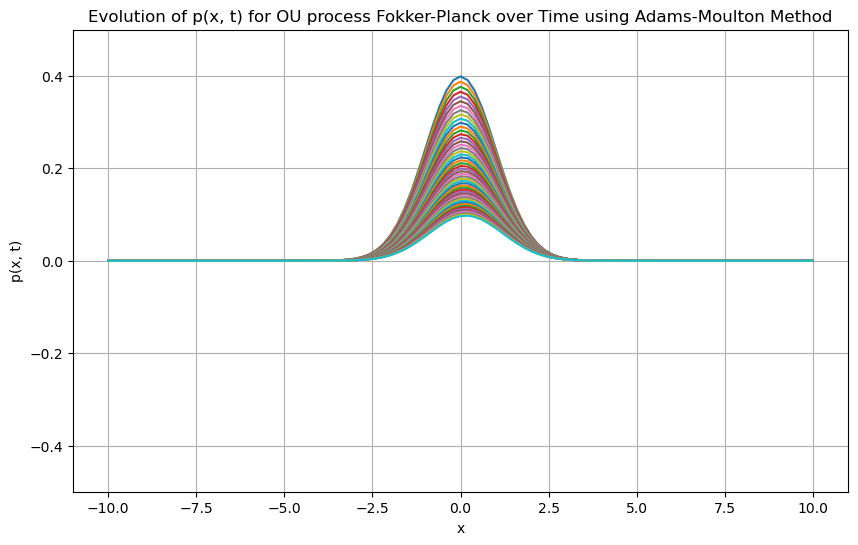

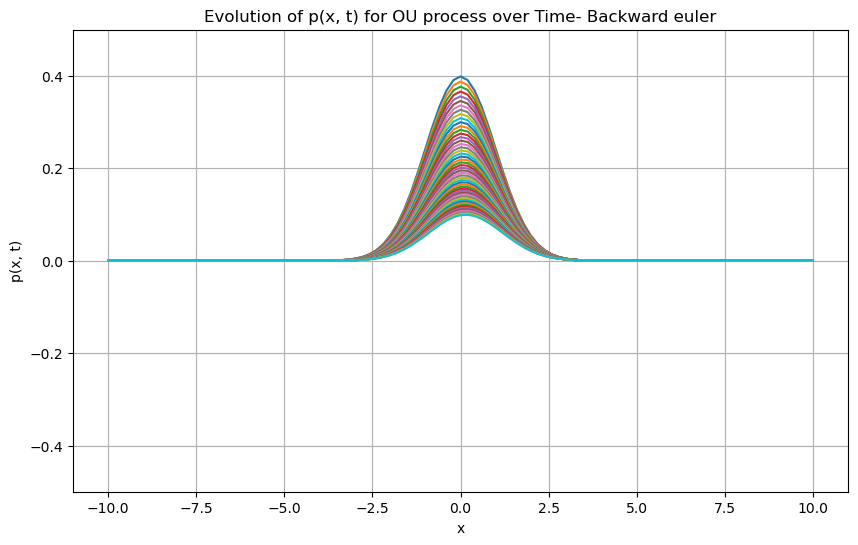

In [18]:
## Non-linear OU Process Using AM2 and Backward Euler##

fig, ax = plt.subplots(figsize=(10, 6))
# AM2 
p_array, x, del_x = AM2 (mu, sigma, nx, nt, del_t, standard_gaussian, nbcleft, nbcright, linear=False)
for j in range(50):
    ax.plot(x, p_array[j], label=f'Time step {j}')

ax.set_xlabel('x')
ax.set_ylabel('p(x, t)')
ax.set_title('Evolution of p(x, t) for OU process Fokker-Planck over Time using Adams-Moulton Method')
ax.set_ylim(-0.5, 0.5)  # Limit y-axis scale
# ax.legend()
plt.grid(True)
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
# Backward Euler #
p_array, x, del_x = FD_odeBEuler_v2_nonlinear(mu, sigma, nx, nt, standard_gaussian, del_t)
for i in range(50):
    plt.plot(x, p_array[i], label=f'Time step {i}')

plt.xlabel('x')
plt.ylabel('p(x, t)')
plt.title('Evolution of p(x, t) for OU process over Time- Backward euler')
plt.ylim(-0.5, 0.5)  # Limit y-axis scale
# plt.legend()
plt.grid(True)
plt.show()


Interpretation of graph: The graphs show that diffusion occurs as expected. But, the advection is not as pronounced. If we look very very closely at figure 1, after so many time steps, we observe that there is a small drift towards right.We can observe that the peak is not symmetric about zero as time progresses, and a slight drift towards right has occured. So, diffusion occurs as weel. However, we are unsure of the magnitude of the drift that has occured, if it should be larger, or smaller. However, since the advection term is multiplied by x and x around 0 is a fraction, we expect the drift to be very miniscule, as is observed in our solution, thereby hinting that the solution plotted is correct. But, due to this we understand that, the initial condition heavily influences the magnitude of the drift term. If the Initial condition was a pdf which was symmetric about 1 or 2 or any other mean value, we can expect the drift to be much bigger than what we get from this initial condition where drift is centered around 0. If the pdf was centered around 1, the drift would be much larger.   
Furthermore, the Boundary conditions seem to be accurate, tangent of pdf at boundaries is 0 from the graphs. 

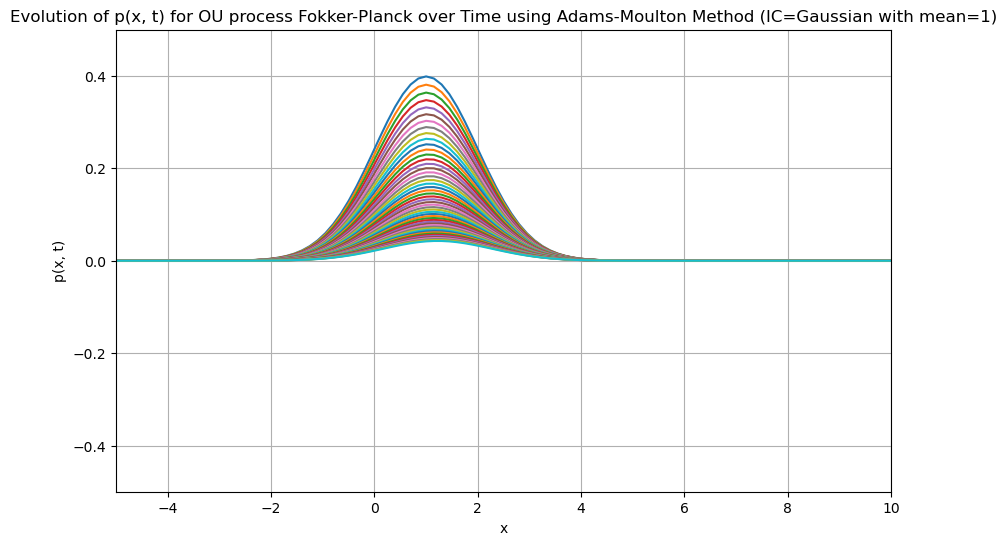

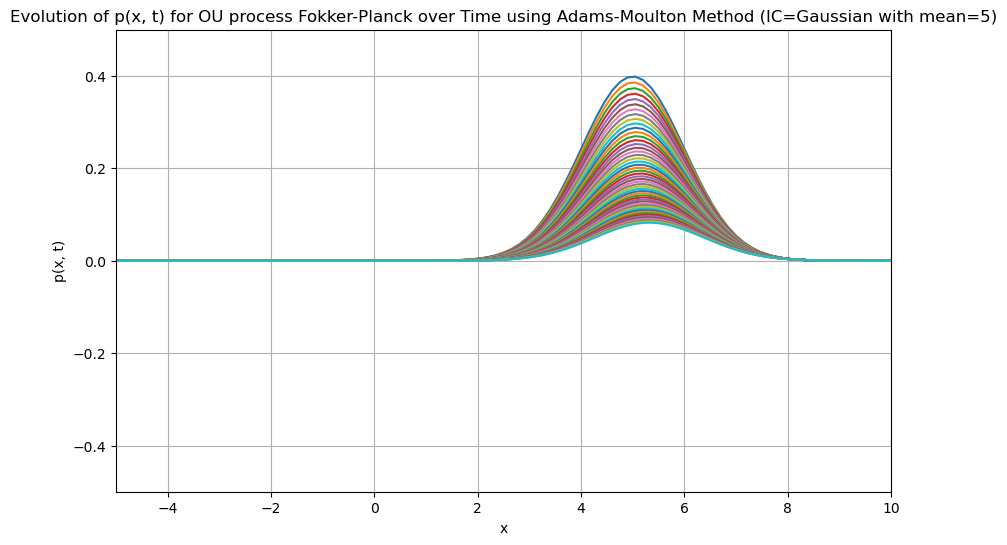

In [19]:
## CHANGING THE MEAN OF THE INITIAL CONDITION ##
a=-5
b=10

shift1_gaussian = lambda x : 1/np.sqrt(2*np.pi) * np.exp(-0.5 * (x-1)**2)
shift5_gaussian = lambda x : 1/np.sqrt(2*np.pi) * np.exp(-0.5 * (x-5)**2)

# Plot the AM2 Method with IC = Gaussian with mean 1
p_array, x, del_x = AM2(mu, sigma, nx, nt, del_t, shift1_gaussian, nbcleft, nbcright, False)

fig, ax = plt.subplots(figsize=(10, 6))
for j in range(0,50):
    ax.plot(x, p_array[j], label=f'Time step {j}')
    
ax.set_xlabel('x')
ax.set_ylabel('p(x, t)')
ax.set_title('Evolution of p(x, t) for OU process Fokker-Planck over Time using Adams-Moulton Method (IC=Gaussian with mean=1)')
ax.set_ylim(-0.5, 0.5)
ax.set_xlim(a,b)
plt.grid(True)
plt.show()

# Plot the AM2 Method with IC = Gaussian with mean 5
p_array, x, del_x = AM2(mu, sigma, nx, nt, del_t, shift5_gaussian, nbcleft, nbcright, False)

fig, ax = plt.subplots(figsize=(10, 6))

for j in range(0,50):
    ax.plot(x, p_array[j], label=f'Time step {j}')

ax.set_xlabel('x')
ax.set_ylabel('p(x, t)')
ax.set_title('Evolution of p(x, t) for OU process Fokker-Planck over Time using Adams-Moulton Method (IC=Gaussian with mean=5)')
ax.set_ylim(-0.5, 0.5)
ax.set_xlim(a,b)
plt.grid(True)
plt.show()

Interpretation of graph: As explained earlier, as the initial condition changes and gets shifted to mean=1, or mean=5 for gaussian pdf of standard deviation=1, we observe that, the drift is more pronounced. Hence out graph is accurate. Further, let us examine the case when IC is a gaussian centered at x=10, with std dev=1.

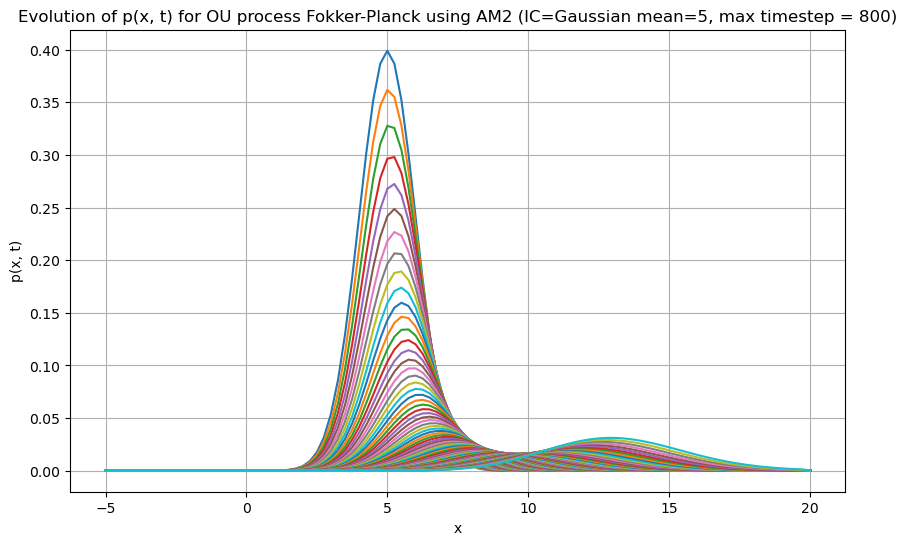

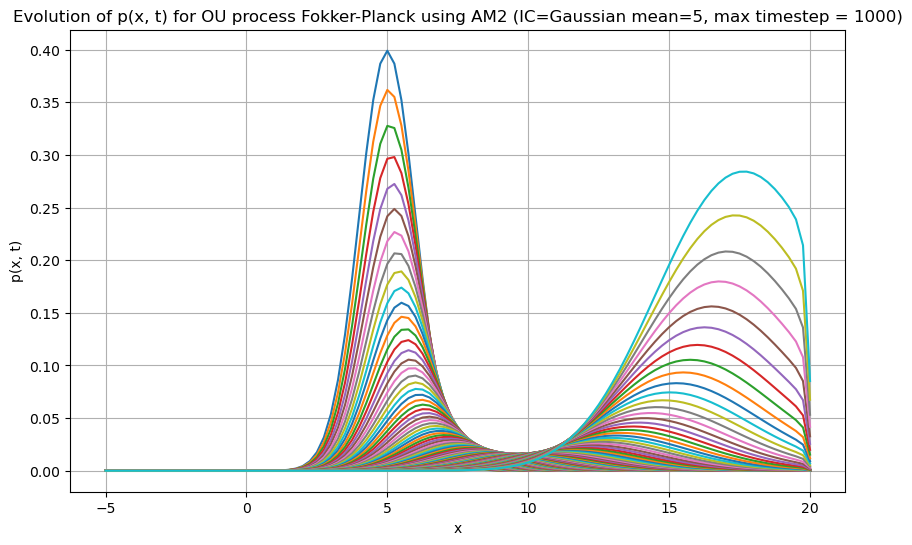

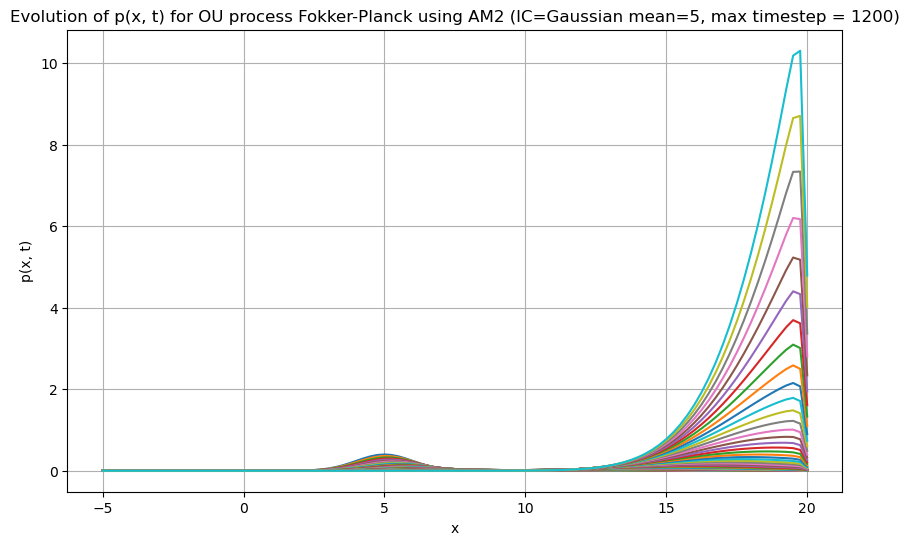

In [20]:
a = -5 #left boundary
b = 20 #right boundary
nx = 100  # Number of grid points
nt=3500 # Number of time steps
del_t=0.001 # Time step


def AM2(mu, sigma, nx, nt, del_t, initial_condition, nbcleft, nbcright, linear = True):
    """
    This function does the same thing as the AM2 function as above,
    just re-running with different boundary.

    """
    # Discretization
    del_x = (b-a)/nx # Grid spacing
    x = np.linspace(a, b, nx + 1)

    # Initialize solution arrays
    y = np.zeros((nt+1, nx+1))
    y[0] = initial_condition(x)  # Initial condition
    
    # Main matrix
    if linear:
        A, bc_vector = fd_advection_diffusion_matrix (mu, sigma, nx, del_t, del_x, nbcleft, nbcright)
    elif linear == False:
        A = del_t*create_nonlinear_matrix_A(x, mu, sigma, del_x)
        bc_vector = np.zeros(nx+1)
        
    # Adams-Moulton coefficients (2nd order)
    alpha0 = 1/2
    alpha1 = 1/2

    # Corrector (Adams-Moulton 2nd order)
    for i in range(1, nt+1):
        y_pred = y[i-1] + np.dot(A, y[i-1])
        y[i] = y[i-1] + np.dot(A, alpha0 * y[i-1] + alpha1 * y_pred)

    return y, x, del_x


# Call the AM2 function with IC = Gaussian with mean 5
p_array, x, del_x = AM2(mu, sigma, nx, nt, del_t, shift5_gaussian, nbcleft, nbcright, False)

fig, ax = plt.subplots(figsize=(10, 6))

for j in range(0,800,10):
    ax.plot(x, p_array[j], label=f'Time step {j}')

ax.set_xlabel('x')
ax.set_ylabel('p(x, t)')
ax.set_title('Evolution of p(x, t) for OU process Fokker-Planck using AM2 (IC=Gaussian mean=5, max timestep = 800)')
plt.grid(True)
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))

for j in range(0,1000,10):
    ax.plot(x, p_array[j], label=f'Time step {j}')

ax.set_xlabel('x')
ax.set_ylabel('p(x, t)')
ax.set_title('Evolution of p(x, t) for OU process Fokker-Planck using AM2 (IC=Gaussian mean=5, max timestep = 1000)')
plt.grid(True)
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))

for j in range(0,1200,10):
    ax.plot(x, p_array[j], label=f'Time step {j}')

ax.set_xlabel('x')
ax.set_ylabel('p(x, t)')
ax.set_title('Evolution of p(x, t) for OU process Fokker-Planck using AM2 (IC=Gaussian mean=5, max timestep = 1200)')
plt.grid(True)
plt.show()

Interpretation of graph: We observe, as time evolves, the solution initially evolves into a bi-modal distribution, with comparable peaks. (due to IC and evolution of OU solution ) As the solution evolves further, we see that the the Initial condition is forgotten and, the solution evolves to what we suspect resembles the long-term distribution of the OU Stochastic Differential equation (Stationary Distribution). However, we do not think that the evolved solution can be normalized to a pdf because, based on the preliminary visual inspection of the graphs, the area under the curve clearly is not 1 especially after around 1200 timesteps. We suspect this might be due to lack of conservation of properties in finite difference methods. Another possibility is that this is evolving into a Dirac-Delta Distribution. As of now, we cannot say anything about this result without further studies. We would like to try finite volume method and build test-cases to better understand this behavior.

## Discussion [10 pts]

Evaluate the results of your project including 
* Why should I believe that your numerical results are correct (convergence, test cases etc)?
* Did the project work (in your opinion)?
* If yes:  what would be the next steps to try
* If no:  Explain why your approach did not work and what you would do differently next time


**Test Cases**

We run test case where we simulate pure diffusion and pure advection on Initial condition- Standard normal distribution. We get the results as expected. 

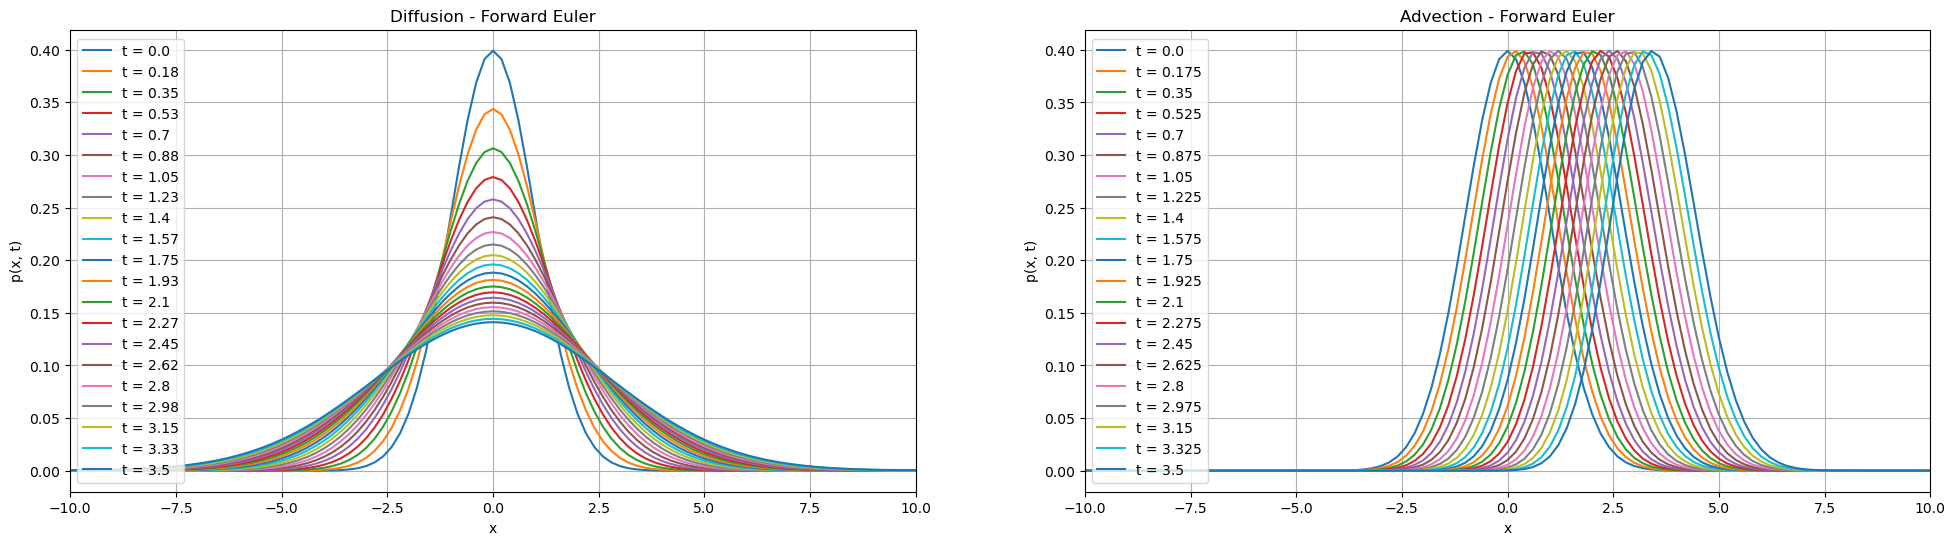

In [21]:
## Forward Euler Test Cases: Advection and Diffusion (separately)##

a=-10
b=10
nx=100 #number of space grids
nt=3500 #number of time steps
del_t = 0.001 #uniform size of time steps

fig = plt.figure(figsize=(24,6))

# Diffusion
mu = 0.
sigma = 1.

p_array, x, del_x = FD_FEuler_v1 (mu, sigma, nx, nt, del_t, standard_gaussian, nbcleft, nbcright)

axes = fig.add_subplot(1, 2, 1)
for j in range(0,nt+1,int(nt/20)):
      axes.plot(x, p_array[j], label=f"t = {round(j*del_t,2)}")

axeslabel("Diffusion - Forward Euler")
plt.xlim(a, b) # Limit x-axis scale

# Advection
mu = 1.
sigma = 0.

p_array, x, del_x = FD_FEuler_v1 (mu, sigma, nx, nt, del_t, standard_gaussian, nbcleft, nbcright)

axes = fig.add_subplot(1, 2, 2)
for j in range(0,nt+1,int(nt/20)):
      axes.plot(x, p_array[j], label=f"t = {round(j*del_t,4)}")

axeslabel("Advection - Forward Euler")
plt.xlim(a, b) # Limit x-axis scale

plt.show()

Yes, the project was successful. Initially, we used FDM and studied advection-diffusion equations with constant drift and diffusion coefficients. We established that our time-marching methods and space discretizations yield accurate results. Futher, when we extended the method to non-linear Fokker-Planck PDE obtained from OU process, we notice some inexplicable behaviours. It seems to work for certain initial conditions in certain domains. However, it blows up for certain other cases.We are unsure as to why such behaviour is exhibited. We suspect lack of conservation of properties in FDM might be leading to this, but are unsure. We would need to conduct further studies by comparing different methods like FVM, to rule out this possibility. 

Contributions:
We discussed the theories and derivations of matrices together, or separately and checked each other.
Jina - coded finite difference discretization for advection-diffusion equation with constant coefficients - Forward/Backward Euler.
Jayanthi- coded finite difference discretization for Fokker plank equation of OU process- Backward Euler and AM2 as well as interpretation.
We also split the work to try out different ways of implementing the boundary condition; one method failed, while another one worked. There were also other solving methods we each tried that did not make it to the report.
We split the work to write down the routines for the time-marching schemes and reviewed the error analysis and stability analysis as discussed in lectures for the 3 time marching schemes chosen. 